<a href="https://colab.research.google.com/github/Pesolo/first_ML/blob/main/zin_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [145]:
sam = pd.read_csv('SampleSubmission.csv')
var_dec = pd.read_csv('VariableDescription.csv')
var_dec

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [146]:
df = pd.read_csv('train_data.csv')

df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [147]:
df.shape

(7160, 14)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [149]:
df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,7
Settlement,0
Building Dimension,106
Building_Type,0


In [150]:
df['Geo_Code'].nunique()

1307

In [151]:
df['Insured_Period'].value_counts()

,count
Insured_Period,
1.000000,5325
0.997268,547
0.000000,165
0.747945,60
0.495890,49
...,...
0.554645,1
0.448087,1
0.710383,1


In [152]:
df['Building_Painted'].value_counts()

,count
Building_Painted,
V,5382
N,1778


In [153]:
df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [154]:
df['Building_Painted'] = np.where(df['Building_Painted'] == 'N', 1, 0)

df['Building_Fenced'] = np.where(df['Building_Fenced'] == 'N', 1, 0)

In [155]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,O,R,680.0,1,1800.0,3,1053,0


In [156]:
df['Building_Painted'].value_counts()

,count
Building_Painted,
0,5382
1,1778


In [157]:
df['Building_Fenced'].value_counts()

,count
Building_Fenced,
1,3608
0,3552


In [158]:
df['NumberOfWindows'].value_counts(dropna=False)

,count
NumberOfWindows,
.,3551
4,939
3,844
5,639
2,363
6,306
7,211
8,116
1,75


In [159]:
df['NumberOfWindows'] = df['NumberOfWindows'].str.strip()

In [160]:
df['NumberOfWindows'] = np.where(df['NumberOfWindows']=='>=10', 10, df['NumberOfWindows'])
df['NumberOfWindows'] = np.where(df['NumberOfWindows']=='.', np.nan, df['NumberOfWindows'])

In [161]:
mode_window = df.groupby('Building_Type')['NumberOfWindows'].apply(lambda x: x.median())

print(mode_window)

Building_Type
1    4.0
2    4.0
3    5.0
4    5.0
Name: NumberOfWindows, dtype: float64


In [162]:
def fill_window(column):
  type_build = column[0]
  num_win = column[1]

  if pd.isna(num_win):
    if type_build == 1:
      return '4'
    elif type_build == 2:
      return '4'
    elif type_build ==3:
      return '5'
    elif type_build == 4:
      return '5'
    else:
      return '1'

  else:
    return num_win

In [163]:
df['NumberOfWindows'] = df[['Building_Type', 'NumberOfWindows']].apply(fill_window, axis=1)

In [164]:
df['NumberOfWindows'].value_counts(dropna=False)


,count
NumberOfWindows,
4,3470
5,1659
3,844
2,363
6,306
7,211
8,116
1,75
10,67


In [165]:
df['NumberOfWindows'] = df['NumberOfWindows'].astype('int8')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int64  
 5   Building_Fenced     7160 non-null   int64  
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   int8   
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 734.3+ KB


In [167]:
import seaborn as sns

In [168]:
df['Date_of_Occupancy'].median()

1970.0

In [169]:
rural_df = df[df['Settlement']=='R']

In [170]:
rural_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3610 entries, 1 to 7053
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3610 non-null   object 
 1   YearOfObservation   3610 non-null   int64  
 2   Insured_Period      3610 non-null   float64
 3   Residential         3610 non-null   int64  
 4   Building_Painted    3610 non-null   int64  
 5   Building_Fenced     3610 non-null   int64  
 6   Garden              3603 non-null   object 
 7   Settlement          3610 non-null   object 
 8   Building Dimension  3609 non-null   float64
 9   Building_Type       3610 non-null   int64  
 10  Date_of_Occupancy   3609 non-null   float64
 11  NumberOfWindows     3610 non-null   int8   
 12  Geo_Code            3610 non-null   object 
 13  Claim               3610 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 398.4+ KB


In [171]:
# Find rows with any NaN values
rural_df.loc[rural_df.isna().any(axis=1)]


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
2382,H19098,2015,0.997260,1,0,1,NaN,R,8350.0,3,1985.0,3,33069,1
3664,H6581,2012,1.000000,0,0,1,NaN,R,3900.0,1,1976.0,5,61483,0
3665,H6582,2013,1.000000,0,0,1,NaN,R,3900.0,1,1976.0,5,61483,1
4577,H3915,2013,1.000000,0,0,1,NaN,R,760.0,1,1969.0,4,73015,0
4780,H1571,2013,1.000000,0,0,1,NaN,R,6203.0,1,1990.0,5,74173,0
4790,H5796,2012,1.000000,0,0,1,NaN,R,350.0,1,1960.0,3,74173,0
4791,H5797,2014,1.000000,0,0,1,NaN,R,350.0,1,1960.0,3,74173,0
5567,H17112,2013,0.315068,1,0,0,V,R,NaN,2,NaN,4,78688,0


In [172]:
rural_df.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
count,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3609.000000,3610.000000,3609.000000,3610.00000,3610.000000
mean,2013.834349,0.920813,0.343213,0.001939,0.999446,2178.223885,2.204986,1958.799945,4.33241,0.249861
std,1.397355,0.220371,0.474848,0.043998,0.023534,2499.945899,0.947837,46.183445,1.81028,0.432993
min,2012.000000,0.000000,0.000000,0.000000,0.000000,85.000000,1.000000,1545.000000,1.00000,0.000000
25%,2013.000000,0.997268,0.000000,0.000000,1.000000,600.000000,2.000000,1940.000000,3.00000,0.000000
50%,2014.000000,1.000000,0.000000,0.000000,1.000000,1270.000000,2.000000,1969.000000,4.00000,0.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,2800.000000,3.000000,1990.000000,5.00000,0.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.00000,1.000000


In [173]:
# Grouping by Building_Type and calculating the median of Building Dimension
median_building_dimensions = rural_df.groupby('Building_Type')['Building Dimension'].median()

# Display the result
print(median_building_dimensions)


Building_Type
1    1368.0
2    1150.0
3    1300.0
4    1410.0
Name: Building Dimension, dtype: float64


In [174]:
rural_df['Building Dimension'].fillna(1150.0, inplace=True)

In [175]:
# Find rows with any NaN values
rural_df.loc[rural_df.isna().any(axis=1)]


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
2382,H19098,2015,0.997260,1,0,1,NaN,R,8350.0,3,1985.0,3,33069,1
3664,H6581,2012,1.000000,0,0,1,NaN,R,3900.0,1,1976.0,5,61483,0
3665,H6582,2013,1.000000,0,0,1,NaN,R,3900.0,1,1976.0,5,61483,1
4577,H3915,2013,1.000000,0,0,1,NaN,R,760.0,1,1969.0,4,73015,0
4780,H1571,2013,1.000000,0,0,1,NaN,R,6203.0,1,1990.0,5,74173,0
4790,H5796,2012,1.000000,0,0,1,NaN,R,350.0,1,1960.0,3,74173,0
4791,H5797,2014,1.000000,0,0,1,NaN,R,350.0,1,1960.0,3,74173,0
5567,H17112,2013,0.315068,1,0,0,V,R,1150.0,2,NaN,4,78688,0


In [176]:
# Using apply to calculate mode for each group
mode_occupancy = rural_df.groupby('Building_Type')['Date_of_Occupancy'].apply(lambda x: x.mode())

# Display the result
print(mode_occupancy)


Building_Type   
1              0    1960.0
2              0    1960.0
3              0    1900.0
4              0    1900.0
Name: Date_of_Occupancy, dtype: float64


In [177]:
rural_df['Date_of_Occupancy'].fillna(1960, inplace=True)


<Axes: xlabel='Garden', ylabel='Building Dimension'>

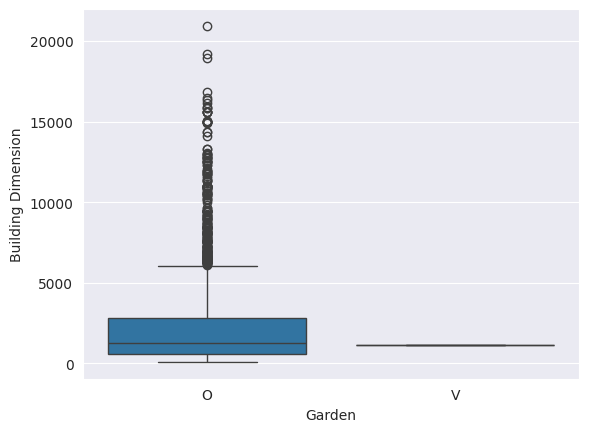

In [178]:
sns.boxplot(x='Garden', y = 'Building Dimension', data=rural_df)

In [179]:
garden_ana = rural_df.groupby('Garden')['Building Dimension'].sum()

garden_ana

,Building Dimension
Garden,
O,7837397.0
V,1150.0


In [180]:
rural_df['Garden'].value_counts()

,count
Garden,
O,3602
V,1


In [181]:
rural_df['Building_Fenced'].value_counts()

,count
Building_Fenced,
1,3608
0,2


In [182]:
rural_df['Garden'].fillna('O', inplace=True)

In [183]:
rural_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3610 entries, 1 to 7053
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3610 non-null   object 
 1   YearOfObservation   3610 non-null   int64  
 2   Insured_Period      3610 non-null   float64
 3   Residential         3610 non-null   int64  
 4   Building_Painted    3610 non-null   int64  
 5   Building_Fenced     3610 non-null   int64  
 6   Garden              3610 non-null   object 
 7   Settlement          3610 non-null   object 
 8   Building Dimension  3610 non-null   float64
 9   Building_Type       3610 non-null   int64  
 10  Date_of_Occupancy   3610 non-null   float64
 11  NumberOfWindows     3610 non-null   int8   
 12  Geo_Code            3610 non-null   object 
 13  Claim               3610 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 398.4+ KB


In [184]:
urban_df = df.loc[df['Settlement']=='U']
urban_df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,V,U,290.0,1,1960.0,4,1053,0
2,H3802,2014,1.0,0,1,0,V,U,595.0,1,1960.0,4,1053,0
3,H3834,2013,1.0,0,0,0,V,U,2840.0,1,1960.0,4,1053,0
6,H7390,2012,1.0,0,1,0,V,U,2830.0,1,1988.0,4,1143,0
7,H14488,2015,1.0,0,1,0,V,U,4952.0,1,1988.0,4,1160,0


In [185]:
urban_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3550 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3550 non-null   object 
 1   YearOfObservation   3550 non-null   int64  
 2   Insured_Period      3550 non-null   float64
 3   Residential         3550 non-null   int64  
 4   Building_Painted    3550 non-null   int64  
 5   Building_Fenced     3550 non-null   int64  
 6   Garden              3550 non-null   object 
 7   Settlement          3550 non-null   object 
 8   Building Dimension  3445 non-null   float64
 9   Building_Type       3550 non-null   int64  
 10  Date_of_Occupancy   3043 non-null   float64
 11  NumberOfWindows     3550 non-null   int8   
 12  Geo_Code            3448 non-null   object 
 13  Claim               3550 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 391.7+ KB


In [186]:
urban_df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,105
Building_Type,0


In [187]:
mean_building_urban = urban_df.groupby('Building_Type')['Building Dimension'].mean().round()

# Display the result
print(mean_building_urban)

Building_Type
1    1708.0
2    1591.0
3    1321.0
4    1596.0
Name: Building Dimension, dtype: float64


In [188]:
def fill_dimen(column):
  build_dim=column[0]
  build_type =column[1]

  if pd.isna(build_dim):
    if build_type == 1:
      return 1708.0
    if build_type == 2:
      return  1591.0
    if build_type == 3:
      return  1321.0
    if build_type == 4:
      return  1596.0

  else:
    return build_dim


In [189]:
urban_df['Building Dimension'] = urban_df[['Building Dimension', 'Building_Type']].apply(fill_dimen, axis=1)

In [190]:
urban_df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,0
Building_Type,0


In [191]:
urban_df['Date_of_Occupancy'].mode()

,Date_of_Occupancy
0,1960.0


In [192]:
urban_df['Date_of_Occupancy'].fillna(1960, inplace=True)

In [193]:
urban_df['Geo_Code'] = pd.to_numeric(urban_df['Geo_Code'], errors='coerce')

In [194]:
# Using apply to calculate mode for each group
mode_resident = urban_df.groupby('Residential')['Geo_Code'].apply(lambda x: x.mode())

# Display the result
print(mode_resident)


Residential   
0            0    21231.0
1            0    33063.0
Name: Geo_Code, dtype: float64


In [195]:
def fill_code(column):
  resident=column[0]
  code =column[1]

  if pd.isna(code):
    if resident == 0:
      return 21231.0
    if resident == 1:
      return 33063.0
  else:
    return code

In [196]:
urban_df['Geo_Code'] = urban_df[['Residential', 'Geo_Code']].apply(fill_code, axis = 1)

In [197]:
urban_df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,0
Building_Type,0


In [198]:
df = pd.concat([rural_df, urban_df], axis=0, ignore_index=True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int64  
 5   Building_Fenced     7160 non-null   int64  
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   int8   
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(6), int8(1), object(4)
memory usage: 734.3+ KB


In [200]:
df['Garden']= np.where(df['Garden']=='V', 1, 0)

In [201]:
df['Geo_Code'] = pd.to_numeric(df['Geo_Code'], errors='coerce')

<Axes: xlabel='Building Dimension', ylabel='Density'>

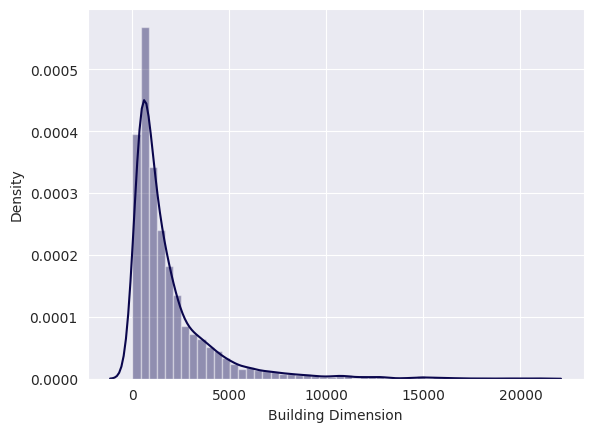

In [202]:
sns.distplot(df['Building Dimension'], color = "#0a064d")

In [203]:
df['YearOfObservation'] = pd.to_datetime(df['YearOfObservation'], format='%Y', errors='coerce')
df['Date_of_Occupancy'] = pd.to_datetime(df['Date_of_Occupancy'], format='%Y', errors='coerce')

In [204]:
df.dropna(inplace=True)

In [205]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H2037,2015-01-01,1.0,0,0,1,0,R,490.0,1,1850-01-01,4,1053.0,0
1,H5053,2014-01-01,1.0,0,0,1,0,R,680.0,1,1800-01-01,3,1053.0,0
2,H4977,2012-01-01,1.0,0,0,1,0,R,535.0,1,1980-01-01,3,1143.0,0
3,H19355,2014-01-01,1.0,0,0,1,0,R,2735.0,1,2013-01-01,3,1173.0,1
4,H18601,2015-01-01,1.0,0,0,1,0,R,520.0,1,2011-01-01,2,1224.0,0


In [206]:
mask = df['Date_of_Occupancy'] >= df['YearOfObservation']

df.loc[mask].count()

,0
Customer Id,20
YearOfObservation,20
Insured_Period,20
Residential,20
Building_Painted,20
Building_Fenced,20
Garden,20
Settlement,20
Building Dimension,20
Building_Type,20


In [207]:
from dateutil.relativedelta import relativedelta

def total_years(row):
    try:
        occupied = pd.to_datetime(row['Date_of_Occupancy'])
        observed = pd.to_datetime(row['YearOfObservation'])
    except Exception as e:
        print(f"Error converting dates: {e}")
        return None  # Handle conversion errors gracefully

    if occupied >= observed:
        return 0
    else:
        # Calculate the difference in years using relativedelta
        delta = relativedelta(observed, occupied)
        return delta.years

In [208]:
df['Total_year'] = df.apply(total_years, axis=1)

In [209]:
print(df['Date_of_Occupancy'].min())
print(df['Date_of_Occupancy'].max())

1700-01-01 00:00:00
2016-01-01 00:00:00


In [210]:
print(df['YearOfObservation'].min())
print(df['YearOfObservation'].max())

2012-01-01 00:00:00
2016-01-01 00:00:00


In [211]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Total_year
0,H2037,2015-01-01,1.0,0,0,1,0,R,490.0,1,1850-01-01,4,1053.0,0,165
1,H5053,2014-01-01,1.0,0,0,1,0,R,680.0,1,1800-01-01,3,1053.0,0,214
2,H4977,2012-01-01,1.0,0,0,1,0,R,535.0,1,1980-01-01,3,1143.0,0,32
3,H19355,2014-01-01,1.0,0,0,1,0,R,2735.0,1,2013-01-01,3,1173.0,1,1
4,H18601,2015-01-01,1.0,0,0,1,0,R,520.0,1,2011-01-01,2,1224.0,0,4


In [212]:
df.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Total_year
count,7095,7095.000000,7095.000000,7095.000000,7095.000000,7095.000000,7095.000000,7095.000000,7095,7095.000000,7095.000000,7095.000000,7095.000000
mean,2013-08-31 22:02:53.530655488,0.909652,0.307822,0.250599,0.499366,0.500493,1868.472586,2.180268,1964-06-20 17:04:08.118393216,4.306554,50472.930937,0.227907,49.196758
min,2012-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1700-01-01 00:00:00,1.000000,1053.000000,0.000000,0.000000
25%,2012-01-01 00:00:00,0.997268,0.000000,0.000000,0.000000,0.000000,530.000000,2.000000,1960-01-01 00:00:00,4.000000,21231.000000,0.000000,32.000000
50%,2013-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1100.000000,2.000000,1960-01-01 00:00:00,4.000000,56121.000000,0.000000,52.000000
75%,2015-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,2241.000000,3.000000,1980-01-01 00:00:00,5.000000,75118.000000,0.000000,55.000000
max,2016-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016-01-01 00:00:00,10.000000,95607.000000,1.000000,316.000000
std,NaN,0.239783,0.461625,0.433389,0.500035,0.500035,2259.535559,0.941662,NaN,1.315167,29919.109270,0.419512,32.445320


<Axes: ylabel='Total_year'>

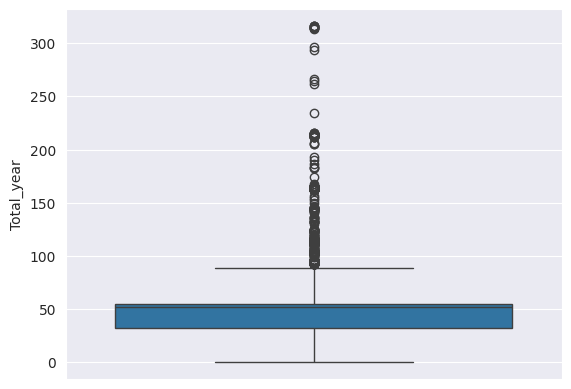

In [213]:
sns.boxplot(data=df, y='Total_year')

In [214]:
df['NumberOfWindows'] = pd.to_numeric(df['NumberOfWindows'])

<Axes: xlabel='Claim', ylabel='count'>

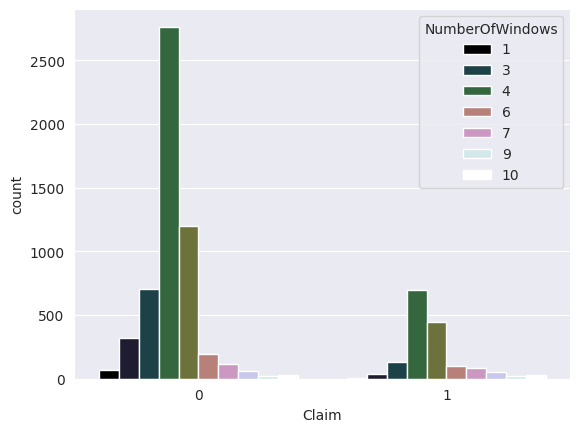

In [215]:
sns.set_style('darkgrid')
sns.countplot(data = df, x='Claim', hue='NumberOfWindows', palette='cubehelix')

In [216]:
df['NumberOfWindows'].value_counts()

,count
NumberOfWindows,
4,3458
5,1645
3,835
2,356
6,299
7,202
8,116
1,72
10,65


In [217]:
df.isna().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,0
Settlement,0
Building Dimension,0
Building_Type,0


In [218]:
import matplotlib.pyplot as plt


<Axes: >

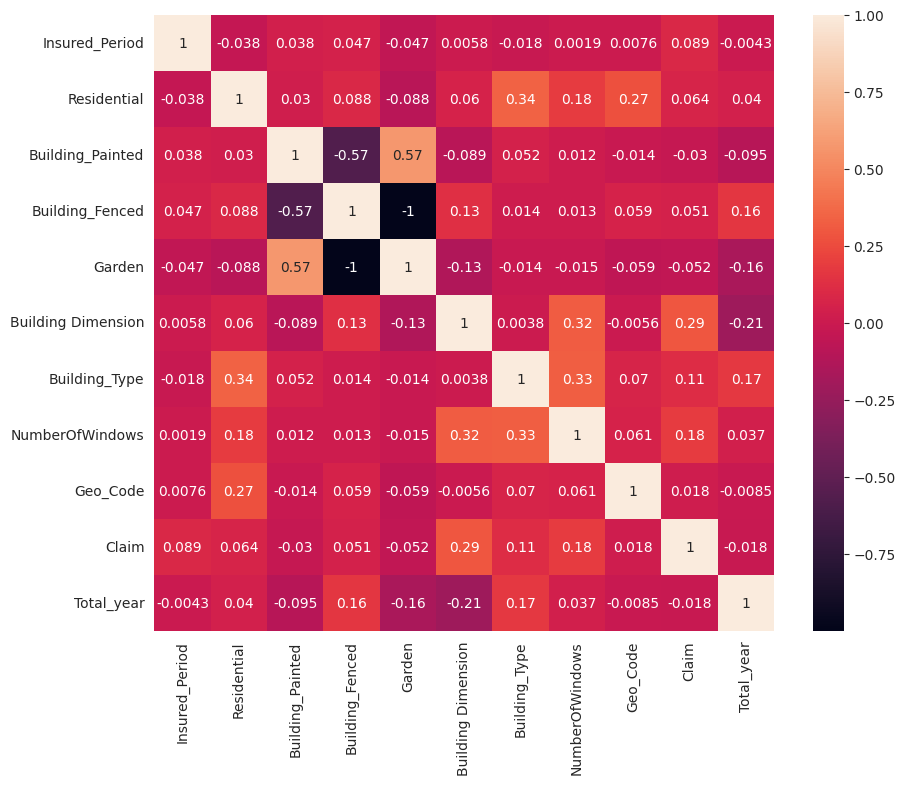

In [219]:
df_num = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True)

In [220]:
# model_df = df.drop(['YearOfObservation', 'Date_of_Occupancy', 'Customer Id', 'Geo_Code', 'Total_year'], axis=1)
model_df = df.drop(['YearOfObservation', 'Date_of_Occupancy', 'Customer Id', 'Geo_Code', 'Total_year'], axis=1)

In [221]:
from sklearn.preprocessing import OneHotEncoder

In [222]:
col_to_encode = ['Settlement', 'Building_Type', 'NumberOfWindows']

encoder = OneHotEncoder(drop='first', sparse=False)

encoded_data = encoder.fit_transform(df[col_to_encode])

col_name = encoder.get_feature_names_out(col_to_encode)

encode_df = pd.DataFrame(encoded_data, columns=col_name)

In [223]:
encode_df.head()

,Settlement_U,Building_Type_2,Building_Type_3,Building_Type_4,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_10
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Settlement_U        7095 non-null   float64
 1   Building_Type_2     7095 non-null   float64
 2   Building_Type_3     7095 non-null   float64
 3   Building_Type_4     7095 non-null   float64
 4   NumberOfWindows_2   7095 non-null   float64
 5   NumberOfWindows_3   7095 non-null   float64
 6   NumberOfWindows_4   7095 non-null   float64
 7   NumberOfWindows_5   7095 non-null   float64
 8   NumberOfWindows_6   7095 non-null   float64
 9   NumberOfWindows_7   7095 non-null   float64
 10  NumberOfWindows_8   7095 non-null   float64
 11  NumberOfWindows_9   7095 non-null   float64
 12  NumberOfWindows_10  7095 non-null   float64
dtypes: float64(13)
memory usage: 720.7 KB


In [225]:
model_df = pd.concat([model_df, encode_df], axis=1)

In [226]:
model_df.head()

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim,...,Building_Type_4,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_10
0,1.0,0.0,0.0,1.0,0.0,R,490.0,1.0,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,R,680.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,R,535.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,R,2735.0,1.0,3.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,R,520.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
model_df.dropna(inplace=True)

In [228]:
row_with_feature = model_df[model_df['Claim']==0]

In [229]:
random_rows = row_with_feature.sample(n=1000, random_state=42)

In [230]:
model_df = model_df.drop(random_rows.index)

In [231]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6030 entries, 0 to 7094
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      6030 non-null   float64
 1   Residential         6030 non-null   float64
 2   Building_Painted    6030 non-null   float64
 3   Building_Fenced     6030 non-null   float64
 4   Garden              6030 non-null   float64
 5   Settlement          6030 non-null   object 
 6   Building Dimension  6030 non-null   float64
 7   Building_Type       6030 non-null   float64
 8   NumberOfWindows     6030 non-null   float64
 9   Claim               6030 non-null   float64
 10  Settlement_U        6030 non-null   float64
 11  Building_Type_2     6030 non-null   float64
 12  Building_Type_3     6030 non-null   float64
 13  Building_Type_4     6030 non-null   float64
 14  NumberOfWindows_2   6030 non-null   float64
 15  NumberOfWindows_3   6030 non-null   float64
 16  NumberOfWin

In [232]:
model_df['Claim'].value_counts()

,count
Claim,
0.0,4426
1.0,1604


In [233]:
model_df['Claim'].dtype

dtype('float64')

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [236]:
x = model_df.drop(['Claim','Settlement', 'Building_Type', 'NumberOfWindows'], axis=1)
y = model_df['Claim']

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [238]:
lr_model = LogisticRegression()

In [240]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6030 entries, 0 to 7094
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Insured_Period      6030 non-null   float64
 1   Residential         6030 non-null   float64
 2   Building_Painted    6030 non-null   float64
 3   Building_Fenced     6030 non-null   float64
 4   Garden              6030 non-null   float64
 5   Building Dimension  6030 non-null   float64
 6   Settlement_U        6030 non-null   float64
 7   Building_Type_2     6030 non-null   float64
 8   Building_Type_3     6030 non-null   float64
 9   Building_Type_4     6030 non-null   float64
 10  NumberOfWindows_2   6030 non-null   float64
 11  NumberOfWindows_3   6030 non-null   float64
 12  NumberOfWindows_4   6030 non-null   float64
 13  NumberOfWindows_5   6030 non-null   float64
 14  NumberOfWindows_6   6030 non-null   float64
 15  NumberOfWindows_7   6030 non-null   float64
 16  NumberOfWin

In [241]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [242]:
y_pred = lr_model.predict(x_test)

In [243]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.97      0.86       896
         1.0       0.68      0.16      0.26       310

    accuracy                           0.77      1206
   macro avg       0.73      0.57      0.56      1206
weighted avg       0.75      0.77      0.71      1206



In [245]:
from sklearn.metrics import roc_auc_score, roc_curve

In [246]:
y_pred_prob = lr_model.predict_proba(x_test)[:, 1]

In [247]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {auc_score:.2f}')

ROC AUC Score: 0.67


In [248]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

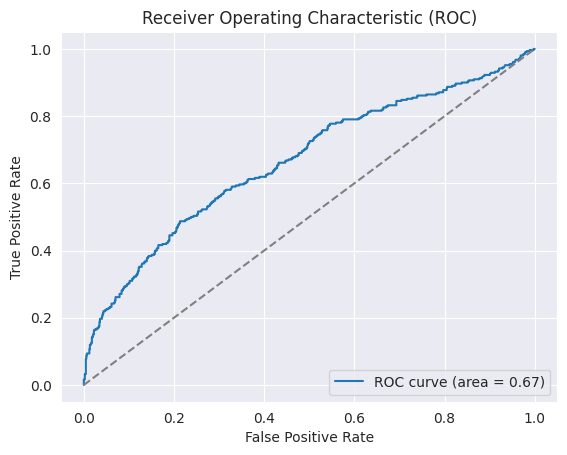

In [249]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

In [250]:
test = pd.read_csv('test_data.csv')

test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [251]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


**IMPOVEMENT**

In [252]:
from imblearn.over_sampling import SMOTE

In [253]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [254]:
lr_model.fit(X_resampled, y_resampled)

LogisticRegression()

In [255]:
y_pred_prob = lr_model.predict_proba(x_test)[:, 1]

In [256]:
y_pred = lr_model.predict(x_test)

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.74      0.78       896
         1.0       0.41      0.51      0.45       310

    accuracy                           0.68      1206
   macro avg       0.61      0.63      0.61      1206
weighted avg       0.71      0.68      0.69      1206



In [258]:
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {auc_score:.2f}')

ROC AUC Score: 0.67


In [259]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

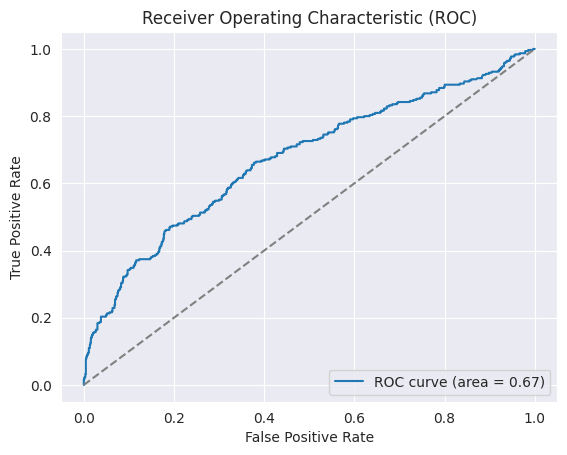

In [260]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

In [261]:
test.drop(['Date_of_Occupancy', 'YearOfObservation', 'Geo_Code'], axis=1, inplace=True)

In [262]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   object 
 4   Building_Fenced     3069 non-null   object 
 5   Garden              3065 non-null   object 
 6   Settlement          3069 non-null   object 
 7   Building Dimension  3056 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   NumberOfWindows     3069 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 239.9+ KB


In [263]:
test.isna().sum()

,0
Customer Id,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,4
Settlement,0
Building Dimension,13
Building_Type,0
NumberOfWindows,0


In [264]:
test['NumberOfWindows'] = test['NumberOfWindows'].str.strip()

In [265]:
test['NumberOfWindows'] = np.where(test['NumberOfWindows']=='>=10', 10, test['NumberOfWindows'])
test['NumberOfWindows'] = np.where(test['NumberOfWindows']=='.', np.nan, test['NumberOfWindows'])

In [275]:
test['NumberOfWindows'].value_counts(dropna=False)

,count
NumberOfWindows,
5,245
10,243
2,240
8,229
1,228
3,227
3,226
6,222
7,210


In [271]:
import random

In [273]:
test['NumberOfWindows'] = test['NumberOfWindows'].apply(lambda x: random.randint(1, 10) if pd.isna(x) else x)

In [274]:
test['Building Dimension'] = test[['Building Dimension', 'Building_Type']].apply(fill_dimen, axis=1)

In [276]:
test['Garden'].value_counts()

,count
Garden,
V,2240
O,825


In [277]:
test['Garden'].fillna('O', inplace=True)

In [278]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   object 
 4   Building_Fenced     3069 non-null   object 
 5   Garden              3069 non-null   object 
 6   Settlement          3069 non-null   object 
 7   Building Dimension  3069 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   NumberOfWindows     3069 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 239.9+ KB


In [279]:
test['Building_Fenced'] = np.where(test['Building_Fenced']=='N', 1, 0)
test['Building_Painted'] = np.where(test['Building_Painted']=='N', 1, 0)
test['Garden'] = np.where(test['Garden']=='V', 1, 0)

In [280]:
cols_to_conver = ['Building_Fenced', 'Building_Painted', 'Garden', 'NumberOfWindows']

test[cols_to_conver] = test[cols_to_conver].apply(pd.to_numeric, errors='coerce')

In [ ]:
test.info()

In [ ]:
test.isna().sum()

In [281]:
encoder2 = OneHotEncoder(drop="first", sparse=False)


test_encode = encoder2.fit_transform(test[['Settlement', 'Building_Type', 'NumberOfWindows']])
test_enc_name = encoder2.get_feature_names_out(['Settlement', 'Building_Type', 'NumberOfWindows'])
test_settle = pd.DataFrame(test_encode, columns=test_enc_name)

In [282]:
test_settle.head()

,Settlement_U,Building_Type_2,Building_Type_3,Building_Type_4,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_10
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
test = pd.concat([test.drop(['Settlement', 'Building_Type'], axis =1), test_settle], axis=1)

In [284]:
test_features = test.drop(columns=['Customer Id', 'NumberOfWindows'])

In [285]:
predictions = lr_model.predict(test_features)

In [286]:
submission = pd.DataFrame({
    'Customer Id': test['Customer Id'],  # Attach the ID column
    'Claim': predictions  # The predicted values
})

In [287]:
submission.head()

,Customer Id,Claim
0,H11920,0.0
1,H11921,0.0
2,H9805,0.0
3,H7493,0.0
4,H7494,0.0


In [288]:
submission['Claim'] = submission['Claim'].astype('int')

In [289]:
submission.head()

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


In [290]:
submission.to_csv('submission.csv', index=False)